# Imports

In [1]:
import cropper
import dm_den
import dm_den_viz
import math
import paths
import itertools
import pickle
import scipy
import numpy as np
from progressbar import ProgressBar
from importlib import reload
from staudt_utils import print_eq
from astropy import units as u, constants as c
from adjustText import adjust_text

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.grid'] = False
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=17
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=14
rcParams['figure.facecolor']='white'

mls = 11. #marker label size

In [3]:
with open(paths.data + 'data_raw.pkl', 'rb') as f:
    results_sigmoid_damped = pickle.load(f)

In [4]:
df = dm_den.load_data('dm_stats_dz1.0_20230724.h5')
df_drop = df.drop(['m12w', 'm12z'])

In [5]:
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'
gmr_label = '$\sqrt{Gm/r}\,/\,'\
              '\\left[\mathrm{km\,s^{-1}}\\right]$'
vc_label = '$v_\mathrm{c}\,/\,[\mathrm{km\,s^{-1}}]$'
v_1e4_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{4}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
v_1e3_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{3}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
den_label = '$\\rho_\mathrm{DM}\,/\,\\left[\mathrm{M_\odot kpc^{-3}}\\right]$'

In [5]:
def regress_line(x, reg):
    # Take regression parameters and an x; return the log y value
    return np.log10(10.**reg[1]*x**reg[0][0])

def plt_mw(ax, vcirc, reg):
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    y = regress_line(vcirc, reg)
    ax.vlines(np.log10(vcirc), 
                  ymin=ylim[0],
                  ymax=y)
    ax.hlines(y,
              xmin=xlim[0],
              xmax=np.log10(vcirc))
    ax.set_ylim(*ylim)
    ax.set_xlim(*xlim)
    return None

In [6]:
# v0 ranges from Sofue 2020
v0_sofu=238.
dv0_sofu=14.
log_dv0_neg = np.log10(v0_sofu/(v0_sofu-dv0_sofu))
log_dv0_pos = np.log10((v0_sofu+dv0_sofu)/v0_sofu)

# Density ranges from Sofue 2020
rho_sofu = 0.39*u.GeV/c.c**2.*u.cm**-3.
drho_sofu = 0.09*u.GeV/c.c**2.*u.cm**-3.
rho_sofu = rho_sofu.to(u.M_sun*u.kpc**-3.).value
drho_sofu = drho_sofu.to(u.M_sun*u.kpc**-3.).value
rho_min_sofu = np.log10(rho_sofu-drho_sofu)
rho_max_sofu = np.log10(rho_sofu+drho_sofu)

textxy = (0.04, 0.96)
fontsize = 14

# Dispersion

## First Plot

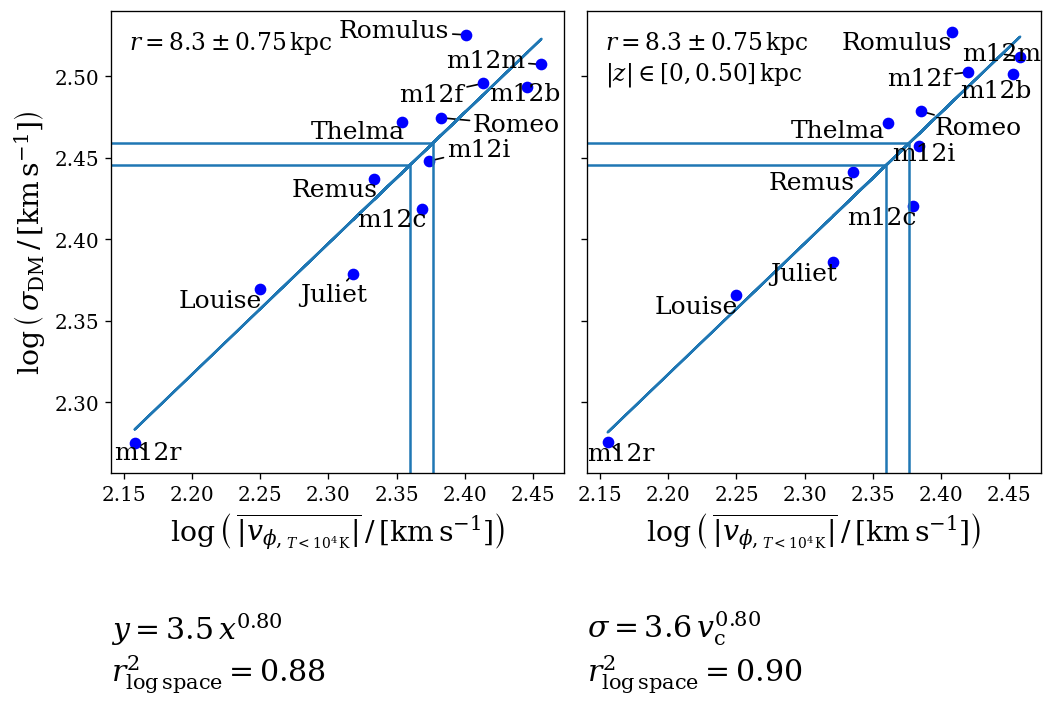

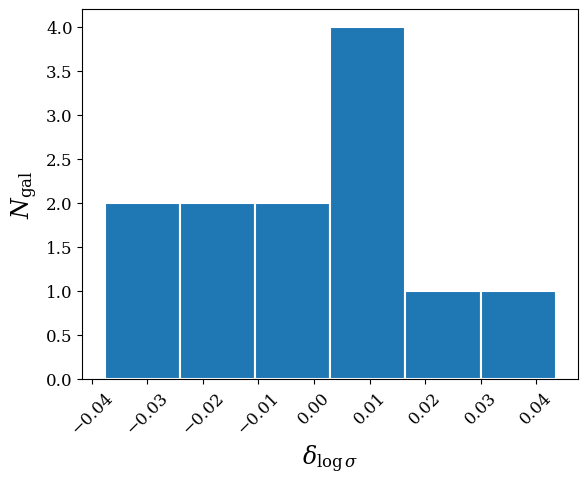

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
reload(dm_den_viz)
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'disp_dm_shell_cyl',
                              xlabel=v_1e4_label,
                              ylabel=disp_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.45, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'})
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'disp_dm_disc_cyl',
                             xlabel=v_1e4_label,
                             ylabel=disp_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.45, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'})
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                            df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

for vcirc in [229., 238.]:
    plt_mw(axs[0], vcirc, reg_shell)
    plt_mw(axs[1], vcirc, reg_disc)

plt.show()


################################################################################
# Errors
################################################################################

df['disp_errors_disc'] = np.log10(df['disp_dm_disc_cyl']) \
                         - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                        reg_disc)

plt.hist(df['disp_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\sigma}$')
plt.xticks(rotation=45)
plt.savefig(paths.figures+'sigma_errors.png',
            bbox_inches='tight',
            dpi=120)
plt.show()

delta_neg = np.percentile(df['disp_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['disp_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

Evans $\frac{\sigma_\mathrm{3D}}{\mathrm{km/s}}=233\sqrt{3/2}=285.4=10^{2.46}$

In [8]:
df[['disp_errors_disc']].sort_values('disp_errors_disc')

,disp_errors_disc
m12c,-0.037662
Juliet,-0.025423
m12b,-0.017619
m12m,-0.012421
m12r,-0.006284
m12i,-0.005488
Louise,0.008813
m12f,0.009638
Romeo,0.013087
Remus,0.015769


## Plotting all gals

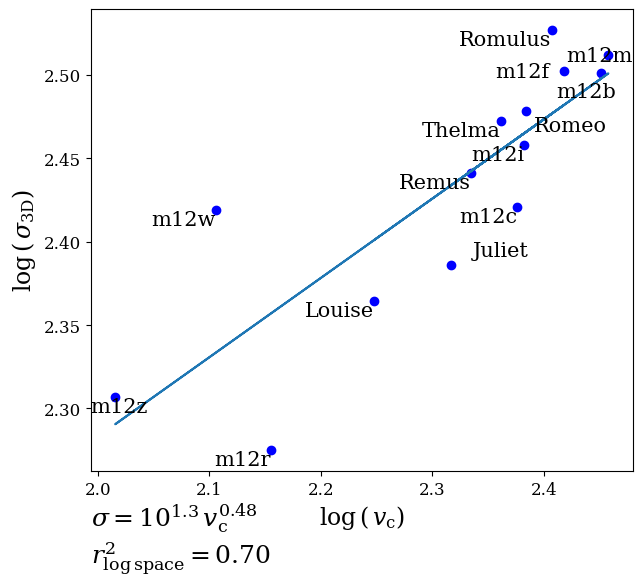

In [8]:
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5',
                   'v_dot_phihat_disc(T<=1e4)',
                   'disp_dm_disc_cyl',
                   '$v_\mathrm{c}$', '$\sigma_\mathrm{3D}$',
                   xadjustment='log', yadjustment='log')

## Checking linear

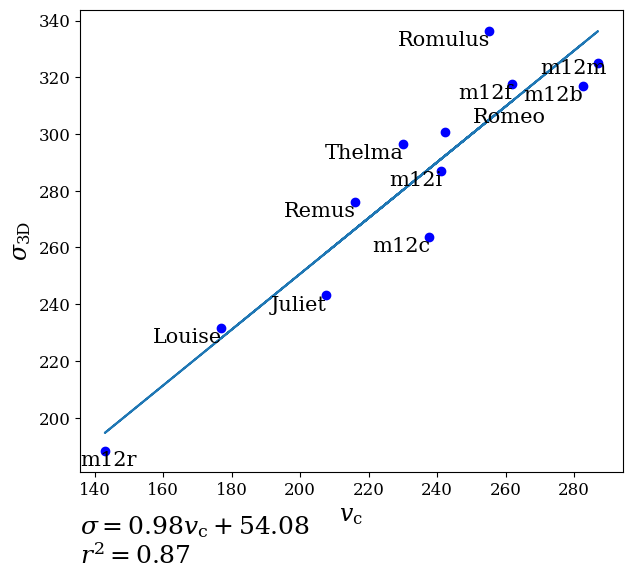

In [9]:
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5',
                   'v_dot_phihat_disc(T<=1e4)',
                   'disp_dm_disc_cyl',
                   '$v_\mathrm{c}$', '$\sigma_\mathrm{3D}$',
                   dropgals=['m12z', 'm12w'])

## Dispersion vs. mass

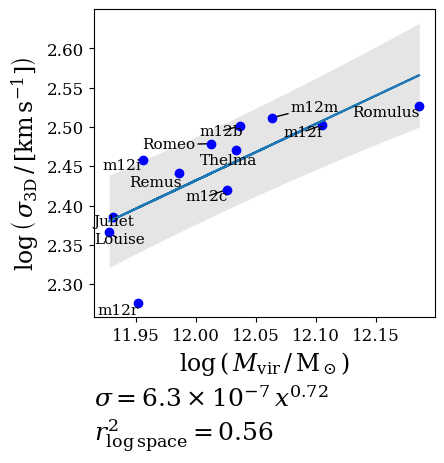

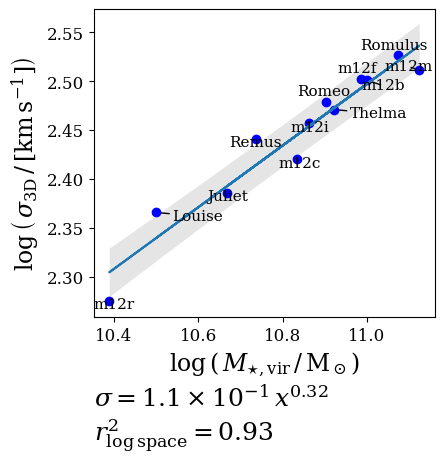

In [10]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                       ycol='disp_dm_disc_cyl', xcol='mvir_fromhcat',
                       ylabel=dm_den_viz.disp_label, 
                       xlabel='$M_\mathrm{vir}\,/\,\mathrm{M}_\odot$',
                       xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                       figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                       adjust_text_kwargs={'min_arrow_len': 0.4},
                       labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None,  
                       ax_slr_kwargs={'show_band':True})

_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                       ycol='disp_dm_disc_cyl', xcol='mvir_stellar',
                       ylabel=dm_den_viz.disp_label, 
                       xlabel='$M_\mathrm{\star,vir}\,/\,\mathrm{M}_\odot$',
                       xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                       figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                       adjust_text_kwargs={'min_arrow_len': 0.4},
                       labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None, 
                       ax_slr_kwargs={'show_band':True})

# Density

## First plot

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

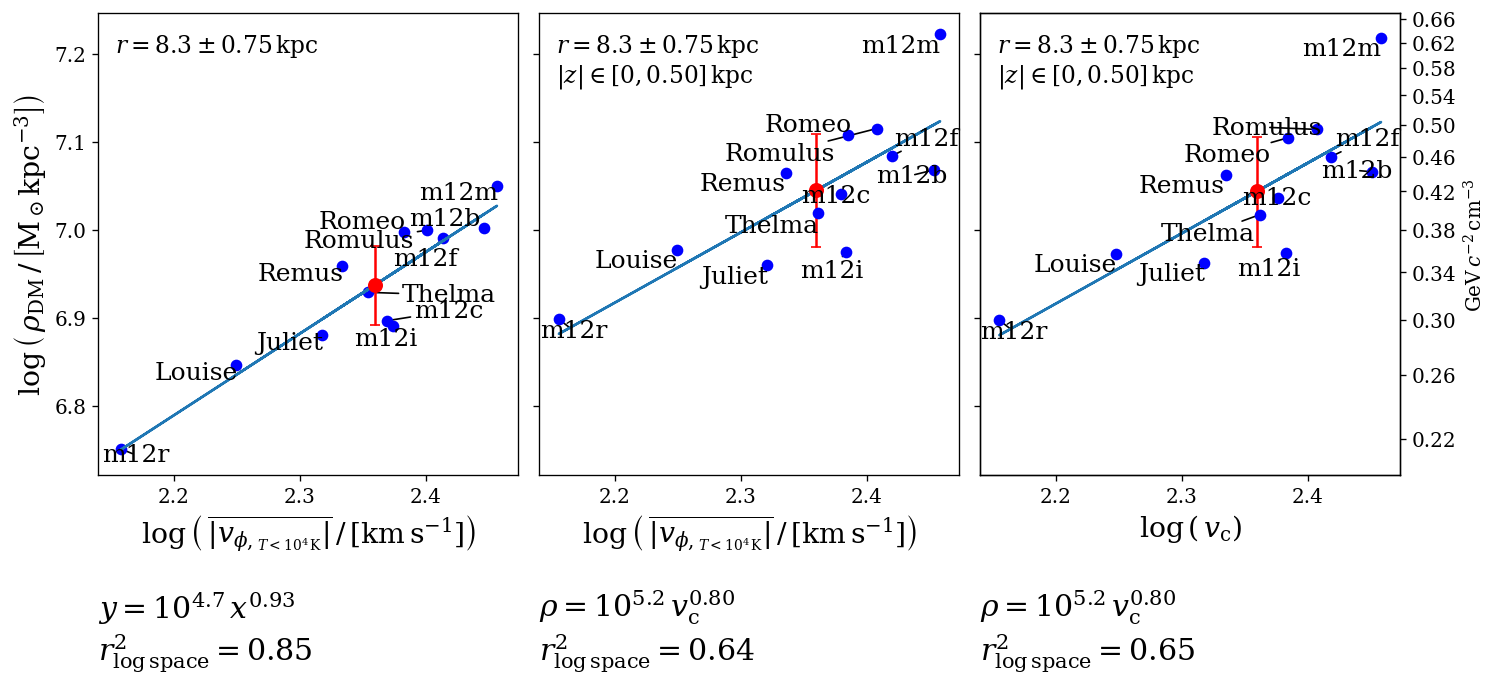

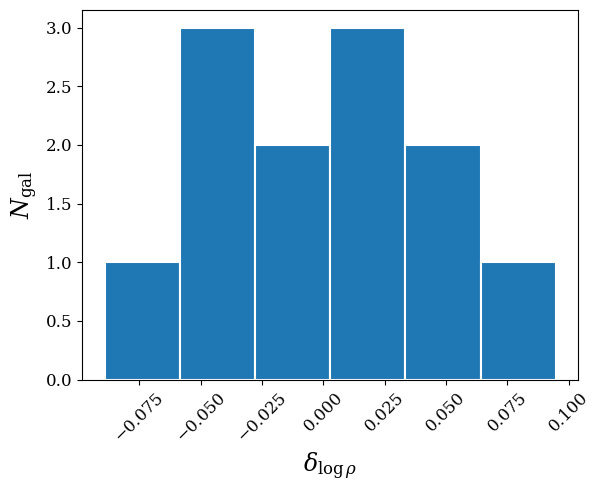

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(14,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'den_shell',
                              xlabel=v_1e4_label,
                              ylabel=den_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.4, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'},
                              showGeV=False, 
                              x_forecast=[[dm_den_viz.vc_eilers]],
                              dX=[[dm_den_viz.dvc_eilers]])
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'den_disc',
                             xlabel=v_1e4_label,
                             ylabel=den_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.4, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'}, showGeV=False,
                             x_forecast=[[dm_den_viz.vc_eilers]],
                             dX=[[dm_den_viz.dvc_eilers]])
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(
                    df.attrs['dr']/2.,
                    df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

dm_den_viz.ax_slr(axs[2], 'dm_stats_dz1.0_20230724.h5', 
                  'v_dot_phihat_disc(T<=1e4)',
                  'den_disc',
                  xlabel='$v_\mathrm{c}$',
                  ylabel='',
                  xadjustment='log', yadjustment='log',
                  formula_y=-0.4, dropgals=['m12w','m12z'],
                  arrowprops={'arrowstyle':'-'}, showGev=True,
                  x_forecast=[[dm_den_viz.vc_eilers]],
                  dX=[[dm_den_viz.dvc_eilers]])
# Data taken with dz = 1.0 kpc
df_dz1 = dm_den.load_data('dm_stats_dz1.0_20230724.h5')
axs[2].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(
                    df_dz1.attrs['dr']/2.,
                    df_dz1.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[2].set_ylabel('')
                  

ylim = axs[0].get_ylim()
xlim = axs[0].get_xlim()
    
plt.show()


################################################################################
# Errors
################################################################################
df['den_errors_disc'] = np.log10(df['den_disc']) \
                    - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                   reg_disc)

plt.hist(df['den_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\\rho}$')
plt.xticks(rotation=45)
plt.savefig(paths.figures+'rho_errors.png',
            bbox_inches='tight',
            dpi=120)
plt.show()

delta_neg = np.percentile(df['den_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['den_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

## Plotting all gals

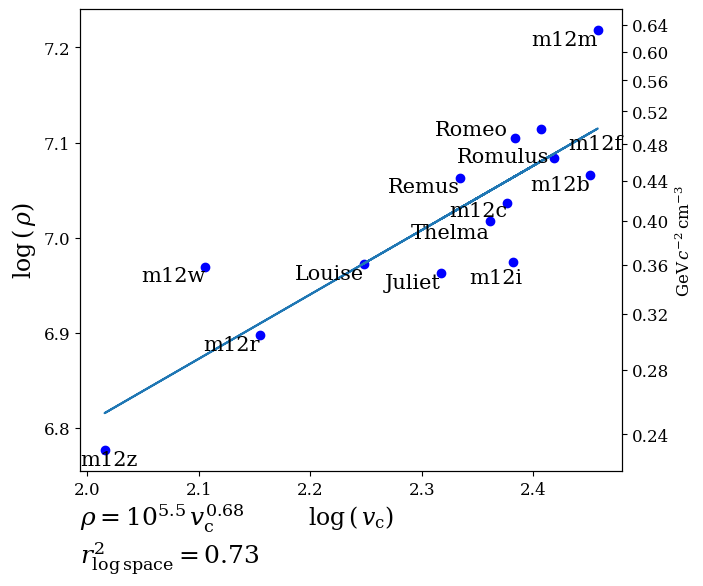

In [7]:
dm_den_viz.plt_slr('dm_stats_dz1.0_20230626.h5',
                   'v_dot_phihat_disc(T<=1e4)',
                   'den_disc',
                   xlabel='$v_{\\rm c}$', ylabel='$\\rho$',
                   xadjustment='log', yadjustment='log')

## Checking linear

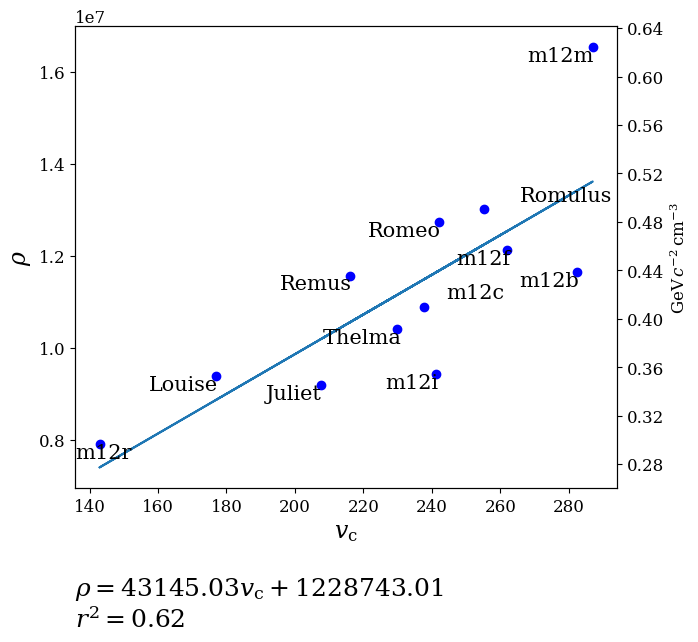

In [12]:
from importlib import reload
reload(dm_den_viz)
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5',
                   'v_dot_phihat_disc(T<=1e4)',
                   'den_disc',
                   '$v_\mathrm{c}$', '$\\rho$',
                   dropgals=['m12z', 'm12w'], formula_y=-0.3)

## Colder Gas

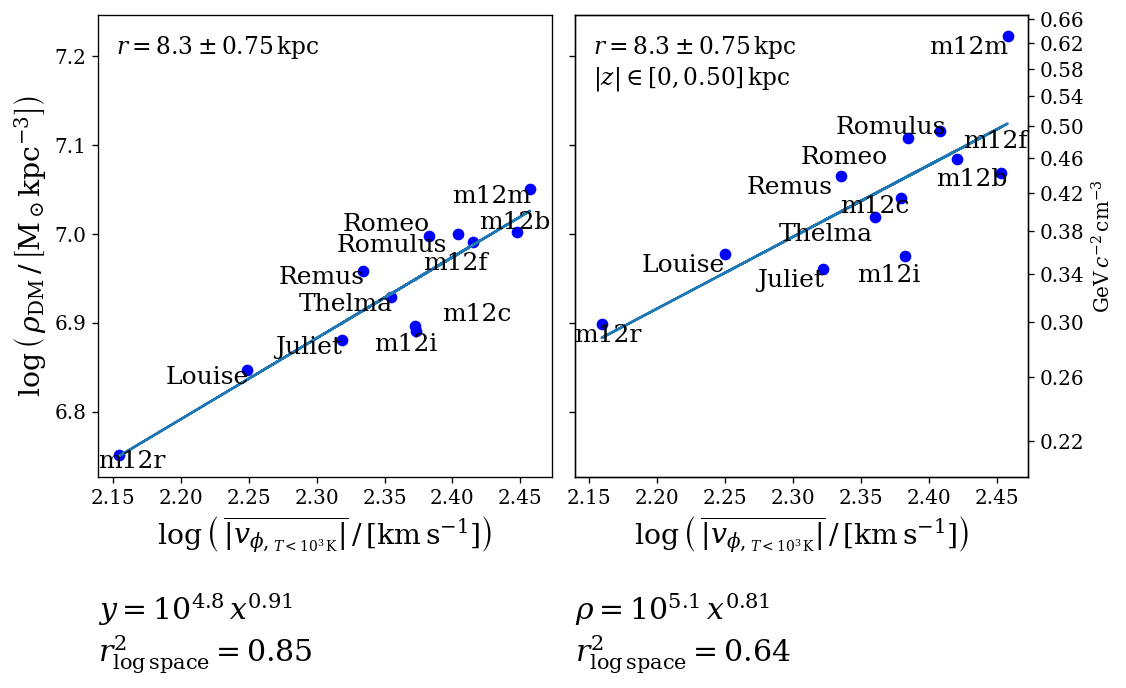

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14
dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                   'v_dot_phihat_shell(T<=1e3)',
                   'den_shell',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'],
                   showGeV=False)

dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                   'v_dot_phihat_disc(T<=1e3)',
                   'den_disc',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'])

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')
plt.show()

## Density vs. mass

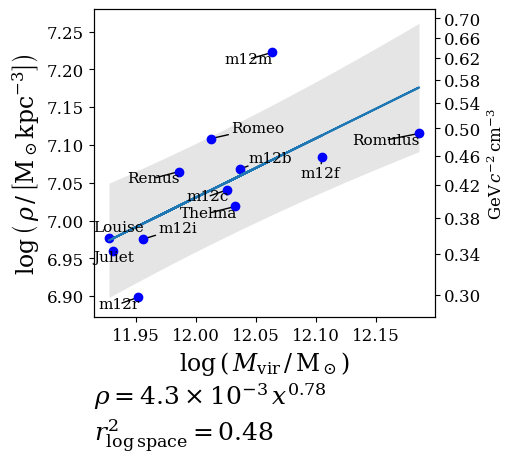

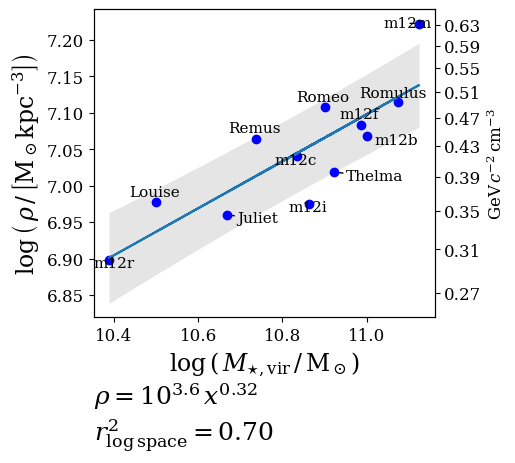

In [14]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                       ycol='den_disc', xcol='mvir_fromhcat',
                       ylabel=dm_den_viz.den_label,
                       xlabel='$M_\mathrm{vir}\,/\,\mathrm{M}_\odot$',
                       xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                       figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                       adjust_text_kwargs={'min_arrow_len': 0.04,},
                       labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None,   
                       ax_slr_kwargs={'show_band':True})

_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                       ycol='den_disc', xcol='mvir_stellar',
                       ylabel=dm_den_viz.den_label, 
                       xlabel='$M_\mathrm{\star,vir}\,/\,\mathrm{M}_\odot$',
                       xadjustment='log', yadjustment='log', 
                       dropgals=['m12w','m12z'],
                       figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                       adjust_text_kwargs={'min_arrow_len': 0.04,},
                       labelsize=mls, 
                       show_formula=True, formula_y=-0.4,
                       tgt_fname=None, 
                       ax_slr_kwargs={'show_band':True})

## Shell vs. Disc Density difference

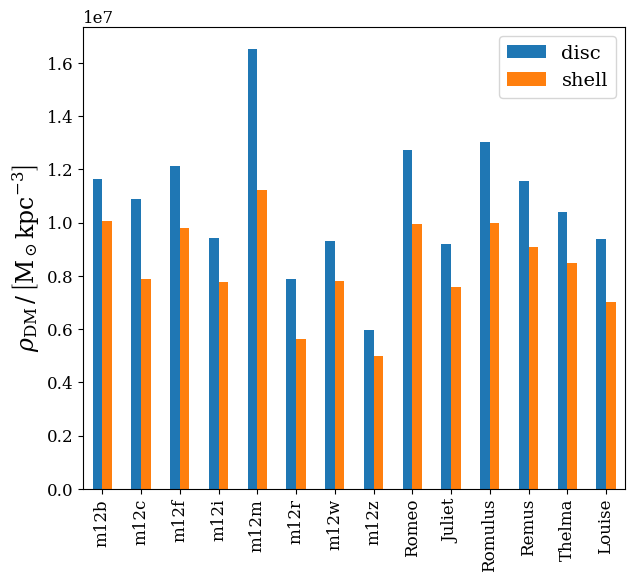

In [15]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['den_disc', 
    'den_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel(den_label)
plt.show()

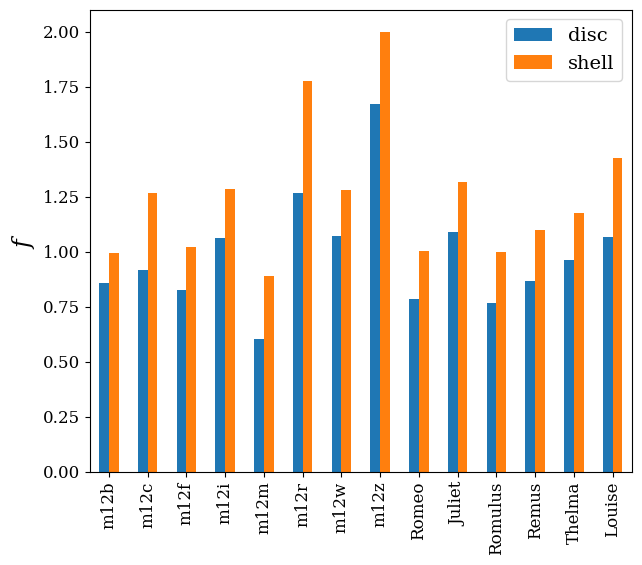

In [16]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['f_disc', 
    'f_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel('$f$')
plt.show()

### Visualizing density vs position
The following plot explains why the average density increases when going from looking at the shell to the disc. Because the density profile is somewhat oblate, as we go from including a variety of $z$'s (constrined to the ring $z^2+x^2=8.3^2$) to only $z=0$, we cross a number of contours and land at a higher average density.

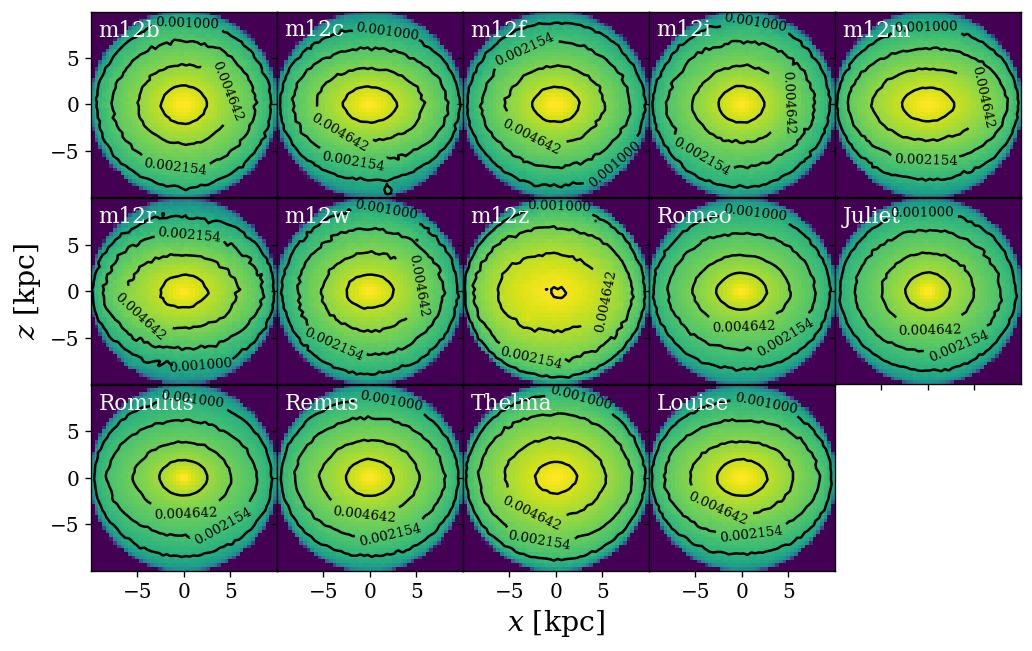

In [17]:
fig,axs = plt.subplots(3, 5, figsize=(10,6*1.01), sharey='row', sharex='col',
                       dpi=120)
fig.subplots_adjust(wspace=0.0, hspace=0.0)
axs[1,0].set_ylabel('$z$ [kpc]')
axs[2,2].set_xlabel('$x$ [kpc]')
axs = axs.ravel()  

for i, galname in enumerate(df.index):
    axs[i].grid(False)
    
    gal = cropper.load_data(galname, ['PartType1'], verbose=False)
    counts,xbins,ybins,image = axs[i].hist2d(gal['PartType1']['coord_rot'][:,0],
                                          gal['PartType1']['coord_rot'][:,2],
                                          bins=int(50), density=True, 
                                          norm=mpl.colors.LogNorm(), 
                                          cmap='viridis')
    CS = axs[i].contour(counts.transpose(),
                    extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                    levels=np.logspace(-3,-2,4), 
                    colors='k')
    axs[i].set_aspect(1)
    axs[i].clabel(CS, inline=True, fontsize=8)
    axs[i].set_facecolor(plt.cm.viridis(0))
    
    axs[i].annotate(galname,
                    (0.04, 0.96),
                    xycoords='axes fraction', fontsize=13,
                    horizontalalignment='left',
                    verticalalignment='top',
                    color='white')
axs[-1].remove()

plt.show()

## Final plot

In [6]:
results_sigmoid_damped['stdev_linear_dendiff']

0.04407725015219601

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

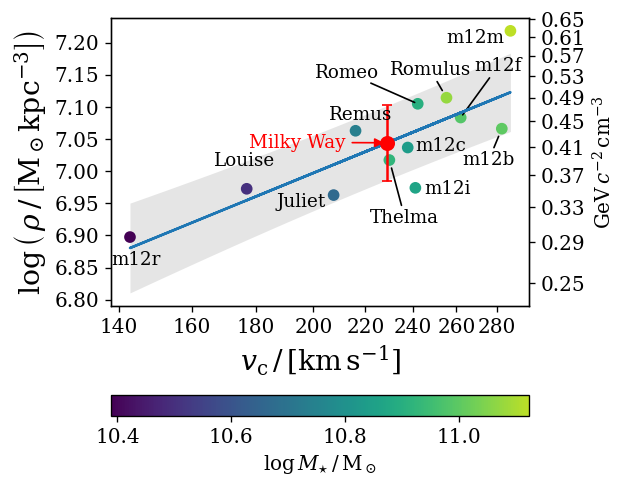

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

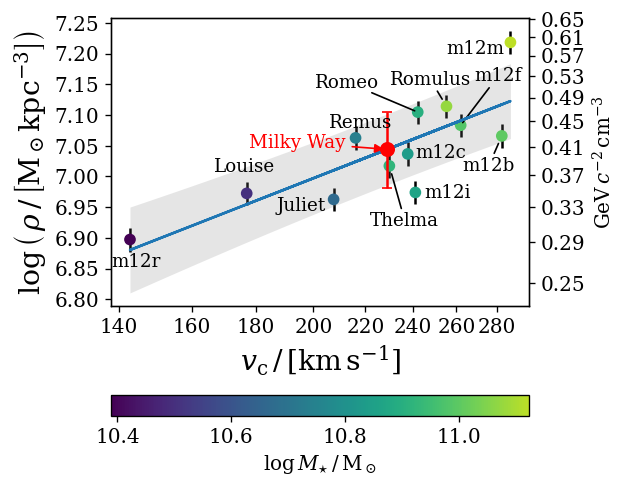

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

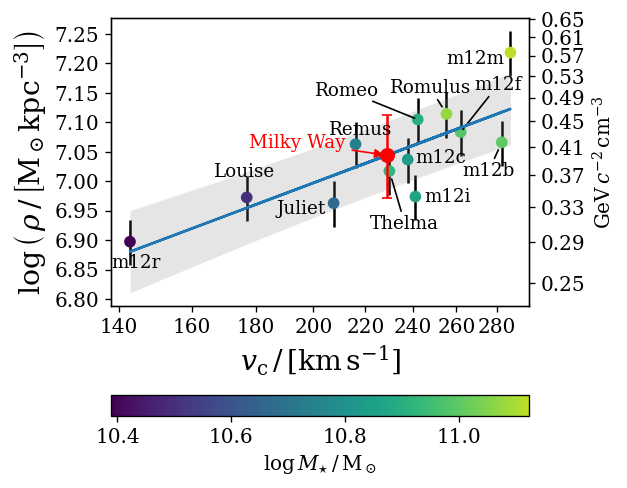

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

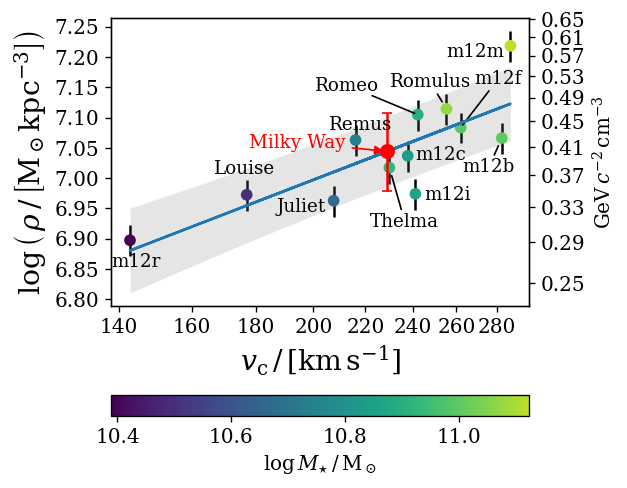

In [9]:
reload(dm_den_viz)
for linear_dyfrac_data in [0.,
                           results_sigmoid_damped['stdev_linear_dendiff'],
                           0.08851714092113545,
                           0.0586]:
    dm_den_viz.plt_vs_vc(
           'den_disc',
           source_fname = 'dm_stats_dz1.0_20230626.h5',
           tgt_fname=None,
           linear_dyfrac_data=linear_dyfrac_data,
           update_val=False,
           adjust_text_kwargs={'force_static': (0.8, 3.),
                               'force_text': (0.6, 0.6),
                               'force_explode': (0.1, 0.08),
                               'min_arrow_len': 35.
                              },
           label_overrides={'m12m': (2.55, 7.2, False),
                            'm12c': (2.41, 7.031, False),
                            'Thelma': (2.22, 6.92, True),
                            'm12i': (2.45, 6.965, False),
                            'Romulus': (2.3, 7.15, True),
                            'Juliet': (1.87, 6.945, False),
                            'm12b': (2.63, 7.01, True)},
           figsize=(4.5, 4.8), labelsize=mls, 
           verbose=False,
           v0=dm_den_viz.vc_eilers,
           dv0=dm_den_viz.dvc_eilers,
           dpi_show=120,
           xtickspace=0.2, beta_sig=1.-0.682, 
           color='masses')

# Exploring error of the density and dispersion forecasts vs. $v_\mathrm{c}$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

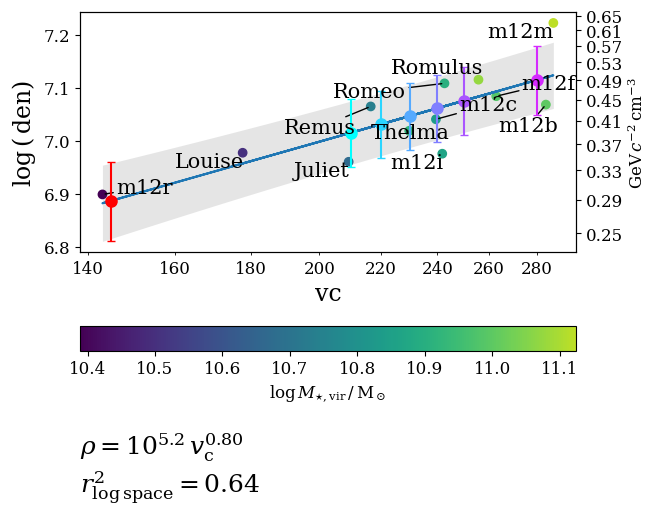

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

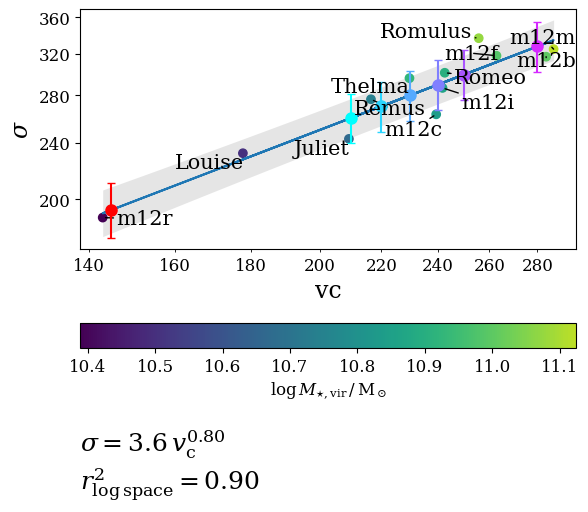

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

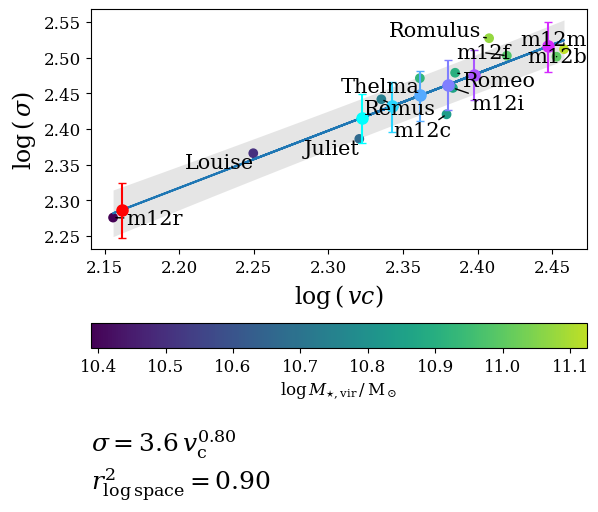

In [5]:
reload(dm_den_viz)
reload(dm_den_viz.staudt_utils)
test_xs = [[145.], [210.], [220.], [230.], [240.], 
           [250.], [280.]]

fig = plt.figure()
ax = fig.add_subplot(111)
dm_den_viz.ax_slr(ax, 'dm_stats_20221208.h5',
                  xcol='v_dot_phihat_disc(T<=1e4)',
                  ycol='den_disc',
                  xlabel='vc', ylabel='\mathrm{den}',
                  xadjustment='logreg_linaxunits',
                  yadjustment='log',
                  xscale='log', yscale='linear',
                  formula_y=-1, 
                  dropgals=['m12z', 'm12w'],
                  x_forecast=test_xs,
                  show_band=True, color='masses', #ytickspace=20.,
                  arrowprops={'arrowstyle':'-'})
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dm_den_viz.ax_slr(ax, 'dm_stats_20221208.h5',
                  xcol='v_dot_phihat_disc(T<=1e4)',
                  ycol='disp_dm_disc_cyl',
                  xlabel='vc', ylabel='$\sigma$',
                  xadjustment='logreg_linaxunits',
                  yadjustment='logreg_linaxunits',
                  xscale='log', yscale='log',
                  formula_y=-1., 
                  dropgals=['m12z', 'm12w'],
                  x_forecast=test_xs,
                  show_band=True, color='masses', ytickspace=40.,
                  arrowprops={'arrowstyle':'-'})
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dm_den_viz.ax_slr(ax, 'dm_stats_20221208.h5',
                  xcol='v_dot_phihat_disc(T<=1e4)',
                  ycol='disp_dm_disc_cyl',
                  xlabel='vc', ylabel='$\sigma$',
                  xadjustment='log',
                  yadjustment='log',
                  xscale='linear', yscale='linear',
                  formula_y=-1., 
                  dropgals=['m12z', 'm12w'],
                  x_forecast=test_xs,
                  show_band=True, color='masses',
                  arrowprops={'arrowstyle':'-'})
plt.show()

# Dispersion verses density

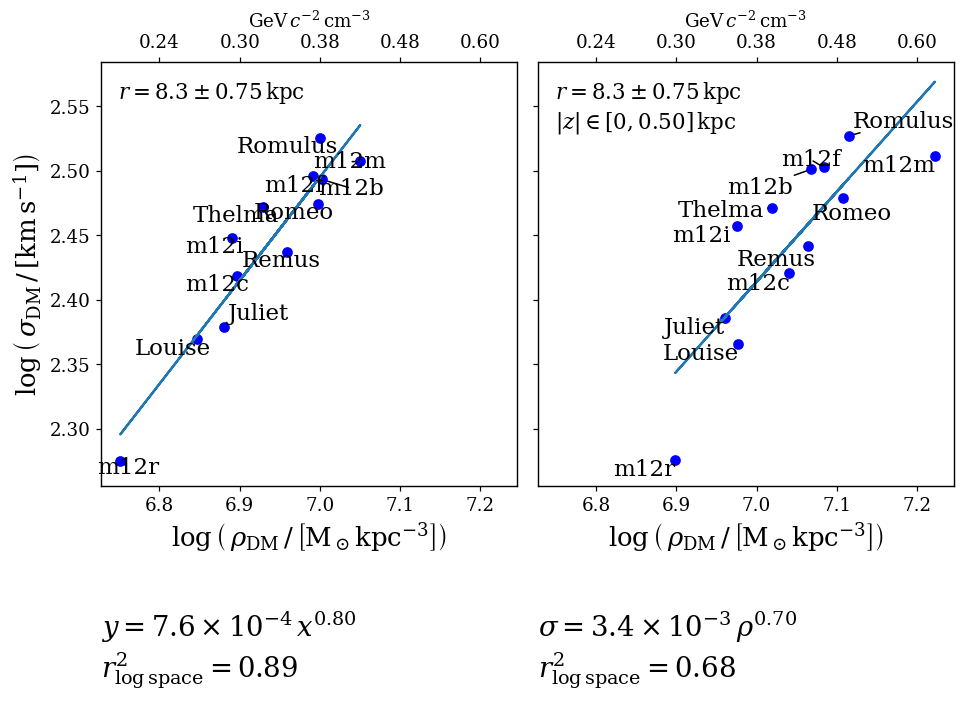

In [19]:
reload(dm_den)
reload(dm_den_viz)

fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=110)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

dm_den_viz.ax_slr(axs[0],
                  'dm_stats_20220629.h5', 
                  'den_shell',
                  'disp_dm_shell_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})
dm_den_viz.ax_slr(axs[1],
                  'dm_stats_20220629.h5', 
                  'den_disc',
                  'disp_dm_disc_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

axs[1].set_ylabel('')
axs[1].locator_params(axis='x', nbins=6) #Increase the number of ticks
for ax in axs:
    dm_den_viz.showGeV_x(ax, xadjustment='log')

plt.show()

# $v_0$ vs. $v_c$

In [8]:
dm_den.save_v0s(initial_fname = 'dm_stats_20221110.h5',
                new_fname = 'dm_stats_20221208.h5')
df_v0 = dm_den.load_data('dm_stats_20221208.h5')

## Linear

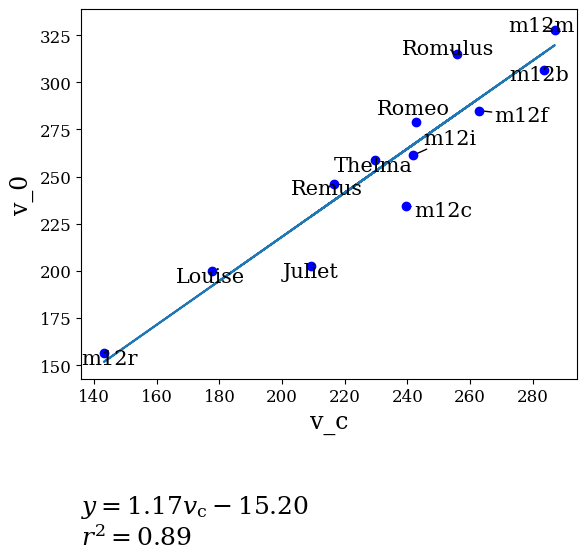

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

dm_den_viz.ax_slr(ax,
                  'dm_stats_20221208.h5', 
                  'v_dot_phihat_disc(T<=1e4)',
                  'v0',
                  ylabel = 'v_0',
                  xlabel = 'v_c',
                  xadjustment=None, yadjustment=None,
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})
plt.show()

## Log

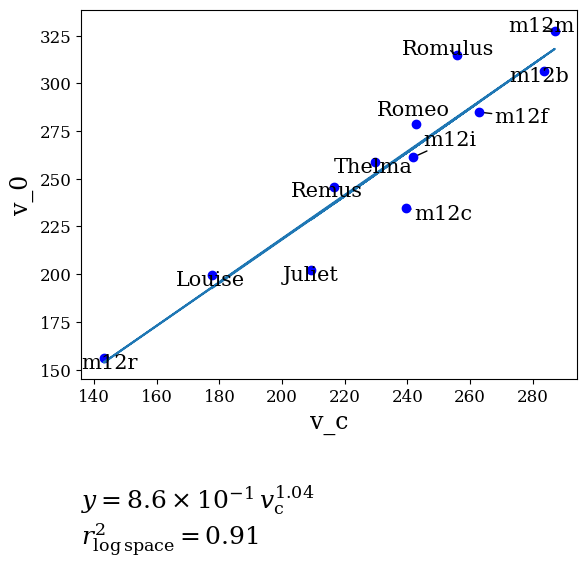

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

dm_den_viz.ax_slr(ax,
                  'dm_stats_20221208.h5', 
                  'v_dot_phihat_disc(T<=1e4)',
                  'v0',
                  ylabel = 'v_0',
                  xlabel = 'v_c',
                  xadjustment='logreg_linaxunits',
                  yadjustment='logreg_linaxunits',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})
plt.show()

# $v_\mathrm{esc}$ vs $v_\mathrm{c}$

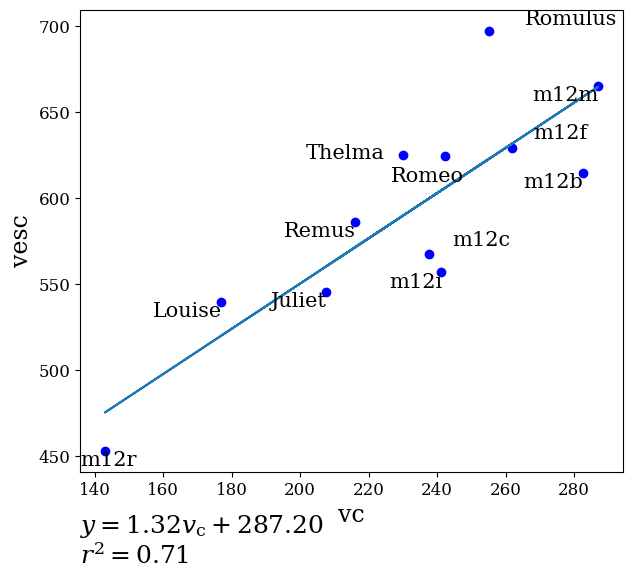

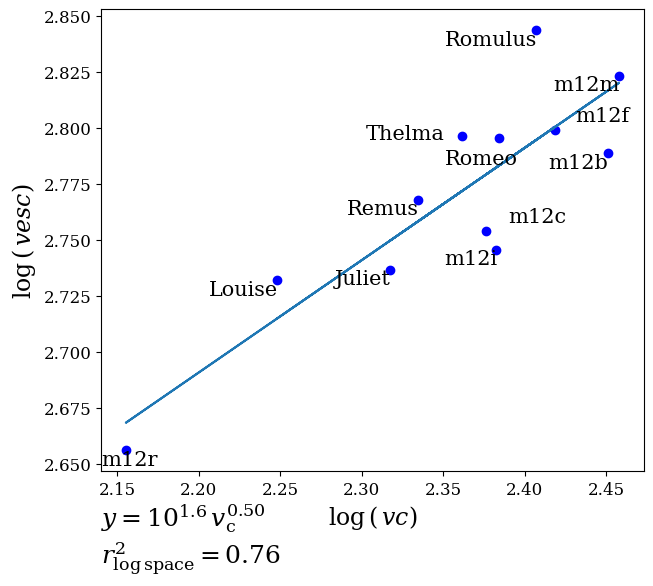

Covariance:
[[ 0.00108919 -0.00289039]
 [-0.00289039  0.00807838]]

====  ========  =========  ========  ===========
..       coeff        +/-    t-stat     p-values
====  ========  =========  ========  ===========
X_0   2.59067   0.0347376  78.4983   2.88658e-15
X_1   0.500895  0.0946041   5.57295  0.000236416
====  ========  =========  ========  ===========
t_c = 1.1
t-test type: 2 tailed, 32% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
31.0578  10.0443            0.01
=======  =======  ==============
r2 = 0.76
r2a = 0.73


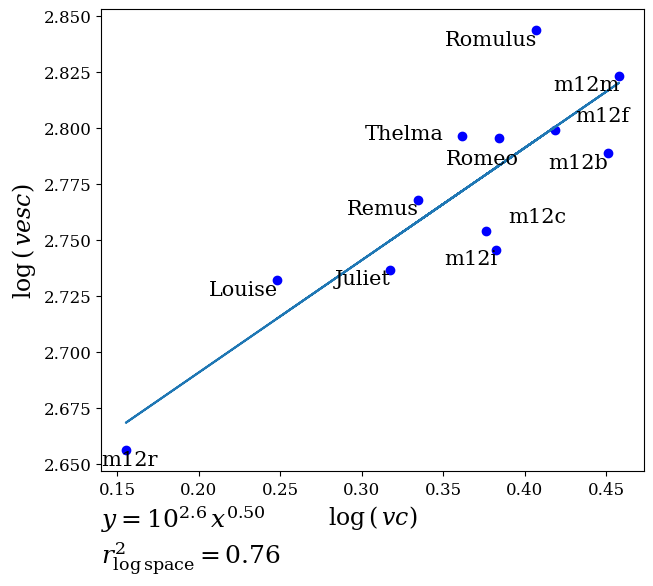

In [23]:
reload(dm_den_viz)
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5', 
                   'v_dot_phihat_disc(T<=1e4)', 
                   'vesc',
                   'vc', 'vesc',
                   dropgals=['m12z', 'm12w'])
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5', 
                   'v_dot_phihat_disc(T<=1e4)', 
                   'vesc',
                   'vc', 'vesc',
                   xadjustment='log', yadjustment='log',
                   dropgals=['m12z', 'm12w'])
dm_den_viz.plt_slr('dm_stats_dz1.0_20230724.h5', 
                   'vc100', 
                   'vesc',
                   'vc', 'vesc',
                   xadjustment='log', yadjustment='log',
                   dropgals=['m12z', 'm12w'], 
                   ax_slr_kwargs=dict(
                       beta_sig=1.-scipy.special.erf(1./np.sqrt(2.)), 
                       verbose=True))

<IPython.core.display.Latex object>

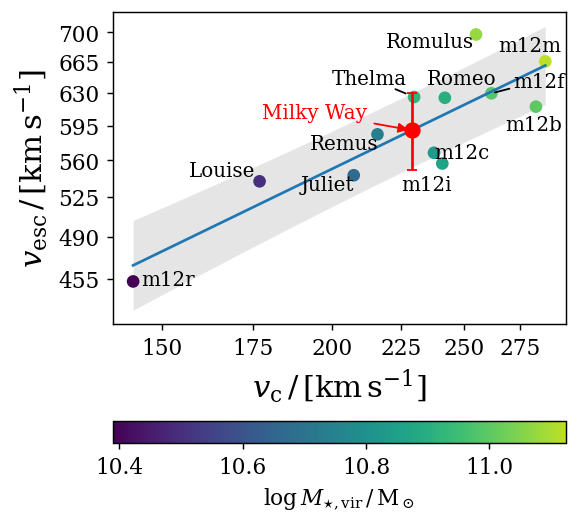

In [24]:
reload(dm_den_viz)
dm_den_viz.plt_vesc_pot_vs_vc('dm_stats_dz1.0_20230724.h5', 
                          tgt_fname='vesc_vs_vc.png',
                          adjust_text_kwargs={#'force_static': (5., 5.),
                                              #'force_text': (0.5, 0.5),
                                              #'force_explode': (.2, .2),
                                              #'explode_radius': 160,
                                              'min_arrow_len': 10.
                                             },
                          formula_y=-1., xtickspace=25., ytickspace=35.,
                          dpi_show=130.,
                          label_overrides={'m12r': (145., 450., False),
                                           'Louise': (157., 545., False),
                                           'm12i': (225., 531., False),
                                           'Romeo': (235., 640., False),
                                           'm12b': (268., 590., False),
                                           'Thelma': (200., 640., True),
                                           'm12m': (265., 678., False)},
                          update_values=True)